In [2]:
import tifffile as tiff
import numpy as np
import os

# Directory where your individual TIFF images are located
image_folder = 'data/labels'

# List all TIFF files in the folder
tiff_images = sorted([f for f in os.listdir(image_folder) if f.endswith('.tif')])

# Load the TIFF images and stack them into a 3D NumPy array (volume)
volume_stack = []
for image_name in tiff_images:
    image_path = os.path.join(image_folder, image_name)
    image = tiff.imread(image_path)
    volume_stack.append(image)

# Convert the list of images to a NumPy array (3D array)
tiff_volume = np.stack(volume_stack, axis=0)

# Save the stacked volume as a multi-page TIFF
output_path = 'outputs/output_volume.tif'
tiff.imwrite(output_path, tiff_volume)

print(f'Multi-page TIFF volume saved as {output_path}')


Multi-page TIFF volume saved as outputs/output_volume.tif


In [1]:
import numpy as np
import tifffile as tiff
from skimage.morphology import skeletonize
import os

tiff_volume = tiff.imread("outputs/output_volume.tif")

# Convert the volume to binary (0s and 1s) if it is not already
binary_volume = tiff_volume > 0  # Thresholding to create binary volume (change based on your data)

# Perform 3D skeletonization
skeleton_volume = skeletonize(binary_volume)

# Save the skeletonized volume as a multi-page TIFF
output_skeleton_path = 'outputs/output_skeleton_volume.tif'
tiff.imwrite(output_skeleton_path, skeleton_volume.astype(np.uint8))  # Save as uint8 (0 or 255)

print(f'Skeletonized multi-page TIFF volume saved as {output_skeleton_path}')


Skeletonized multi-page TIFF volume saved as outputs/output_skeleton_volume.tif


In [3]:
from skan.csr import skeleton_to_csgraph
import tifffile as tiff

# skeleton_volume = tiff.imread('outputs\output_skeleton_volume.tif')

pixel_graph, coordinates = skeleton_to_csgraph(skeleton_volume)

In [3]:
from skan import Skeleton, summarize

branch_data = summarize(Skeleton(skeleton_volume))
branch_data.head()

,skeleton-id,node-id-src,node-id-dst,branch-distance,branch-type,mean-pixel-value,stdev-pixel-value,image-coord-src-0,image-coord-src-1,image-coord-src-2,image-coord-dst-0,image-coord-dst-1,image-coord-dst-2,coord-src-0,coord-src-1,coord-src-2,coord-dst-0,coord-dst-1,coord-dst-2,euclidean-distance
0,0,0,115,42.701885,1,1.0,0.0,52,1041,705,68,1073,710,52,1041,705,68,1073,710,36.124784
1,0,23,94,38.237783,1,1.0,0.0,57,991,749,67,1013,741,57,991,749,67,1013,741,25.455844
2,0,38,123,39.433935,1,1.0,0.0,60,1104,764,68,1095,736,60,1104,764,68,1095,736,30.479501
3,1,55,136,18.999271,0,1.0,0.0,64,1035,786,69,1035,772,64,1035,786,69,1035,772,14.866069
4,0,62,523,23.877586,1,1.0,0.0,65,1032,671,82,1022,677,65,1032,671,82,1022,677,20.615528


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>]],
      dtype=object)

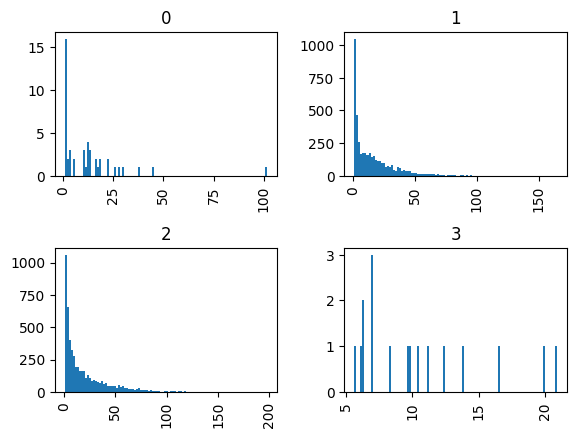

In [4]:
branch_data.hist(column='branch-distance', by='branch-type', bins=100)

In [5]:
# Get basic info about the data
print(branch_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9818 entries, 0 to 9817
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   skeleton-id         9818 non-null   int32  
 1   node-id-src         9818 non-null   int32  
 2   node-id-dst         9818 non-null   int32  
 3   branch-distance     9818 non-null   float64
 4   branch-type         9818 non-null   int32  
 5   mean-pixel-value    9818 non-null   float64
 6   stdev-pixel-value   9818 non-null   float64
 7   image-coord-src-0   9818 non-null   int64  
 8   image-coord-src-1   9818 non-null   int64  
 9   image-coord-src-2   9818 non-null   int64  
 10  image-coord-dst-0   9818 non-null   int64  
 11  image-coord-dst-1   9818 non-null   int64  
 12  image-coord-dst-2   9818 non-null   int64  
 13  coord-src-0         9818 non-null   int64  
 14  coord-src-1         9818 non-null   int64  
 15  coord-src-2         9818 non-null   int64  
 16  coord-

In [6]:
# Describe numerical statistics
print(branch_data.describe())

       skeleton-id    node-id-src    node-id-dst  branch-distance  \
count  9818.000000    9818.000000    9818.000000      9818.000000   
mean      1.281218   66828.360562   67990.895091        18.342992   
std       8.708027   36691.001693   36837.848646        21.690944   
min       0.000000       0.000000      94.000000         1.000000   
25%       0.000000   36622.000000   37682.000000         3.146264   
50%       0.000000   65300.000000   66688.500000        10.242641   
75%       0.000000   97199.000000   98363.750000        25.266188   
max      85.000000  133024.000000  133043.000000       198.052121   

       branch-type  mean-pixel-value  stdev-pixel-value  image-coord-src-0  \
count  9818.000000            9818.0             9818.0        9818.000000   
mean      1.535241               1.0                0.0         536.541454   
std       0.511685               0.0                0.0         214.565230   
min       0.000000               1.0                0.0          5

In [7]:
# Count the occurrences of each branch type
branch_type_counts = branch_data['branch-type'].value_counts()

# Display the result
print(branch_type_counts)


branch-type
2    5268
1    4486
0      47
3      17
Name: count, dtype: int64


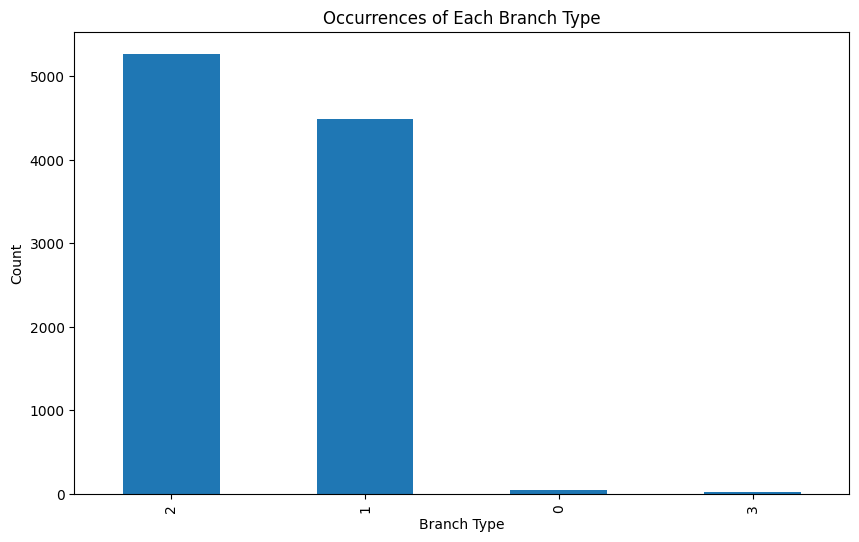

In [8]:
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(10, 6))
branch_type_counts.plot(kind='bar')

# Add labels and title
plt.xlabel('Branch Type')
plt.ylabel('Count')
plt.title('Occurrences of Each Branch Type')

# Display the plot
plt.show()

In [9]:
# Filter for branch-type 3
branch_type_3_data = branch_data[branch_data['branch-type'] == 3]

# Display the result
branch_type_3_data.head(17)

,skeleton-id,node-id-src,node-id-dst,branch-distance,branch-type,mean-pixel-value,stdev-pixel-value,image-coord-src-0,image-coord-src-1,image-coord-src-2,image-coord-dst-0,image-coord-dst-1,image-coord-dst-2,coord-src-0,coord-src-1,coord-src-2,coord-dst-0,coord-dst-1,coord-dst-2,euclidean-distance
1110,0,18980,18980,19.949383,3,1.0,0.0,248,1091,596,248,1091,596,248,1091,596,248,1091,596,0.0
2088,0,31674,31674,6.292529,3,1.0,0.0,334,990,1155,334,990,1155,334,990,1155,334,990,1155,0.0
3256,0,46577,46577,10.438793,3,1.0,0.0,440,914,1185,440,914,1185,440,914,1185,440,914,1185,0.0
3667,0,50699,50699,6.292529,3,1.0,0.0,469,955,636,469,955,636,469,955,636,469,955,636,0.0
4431,0,59255,59255,16.488681,3,1.0,0.0,519,931,641,519,931,641,519,931,641,519,931,641,0.0
4987,0,66416,66416,11.170844,3,1.0,0.0,552,837,1018,552,837,1018,552,837,1018,552,837,1018,0.0
5413,0,72129,72129,9.803119,3,1.0,0.0,580,1169,772,580,1169,772,580,1169,772,580,1169,772,0.0
6276,0,84966,84966,13.756630,3,1.0,0.0,644,992,1146,644,992,1146,644,992,1146,644,992,1146,0.0
6310,0,85229,85229,6.928203,3,1.0,0.0,645,1108,759,645,1108,759,645,1108,759,645,1108,759,0.0
6805,0,90023,90023,6.878315,3,1.0,0.0,670,764,1123,670,764,1123,670,764,1123,670,764,1123,0.0


In [10]:
# Assuming skeleton_volume is a NumPy array
skeleton_volume_shape = skeleton_volume.shape

# Display the number of pixels in each axis
print(f'The skeleton volume has the following dimensions (z, y, x): {skeleton_volume_shape}')

The skeleton volume has the following dimensions (z, y, x): (1035, 1706, 1510)


In [11]:
# Filter for branch-type 3
branch_type_0_data = branch_data[branch_data['branch-type'] == 0]

# Display the result
branch_type_0_data.head(17)

,skeleton-id,node-id-src,node-id-dst,branch-distance,branch-type,mean-pixel-value,stdev-pixel-value,image-coord-src-0,image-coord-src-1,image-coord-src-2,image-coord-dst-0,image-coord-dst-1,image-coord-dst-2,coord-src-0,coord-src-1,coord-src-2,coord-dst-0,coord-dst-1,coord-dst-2,euclidean-distance
3,1,55,136,18.999271,0,1.0,0.0,64,1035,786,69,1035,772,64,1035,786,69,1035,772,14.866069
247,2,3627,3986,12.631546,0,1.0,0.0,119,987,819,123,978,816,119,987,819,123,978,816,10.295630
680,5,11772,11773,1.000000,0,1.0,0.0,190,1271,860,190,1272,860,190,1271,860,190,1272,860,1.000000
902,8,15797,15798,1.000000,0,1.0,0.0,226,1092,767,226,1092,768,226,1092,767,226,1092,768,1.000000
1033,12,17873,17894,3.414214,0,1.0,0.0,242,1082,610,242,1084,608,242,1082,610,242,1084,608,2.828427
1034,13,17874,17884,2.414214,0,1.0,0.0,242,1082,614,242,1083,616,242,1082,614,242,1083,616,2.236068
1036,15,17885,17886,1.000000,0,1.0,0.0,242,1083,619,242,1083,620,242,1083,619,242,1083,620,1.000000
1045,16,17903,17905,2.000000,0,1.0,0.0,242,1085,614,242,1085,616,242,1085,614,242,1085,616,2.000000
1046,17,17906,17914,2.414214,0,1.0,0.0,242,1085,623,242,1086,621,242,1085,623,242,1086,621,2.236068
1047,19,17923,17933,3.414214,0,1.0,0.0,242,1087,722,242,1090,723,242,1087,722,242,1090,723,3.162278


In [12]:
# Filter for branch-type 3
branch_type_1_data = branch_data[branch_data['branch-type'] == 1]

# Display the result
branch_type_1_data.head()

,skeleton-id,node-id-src,node-id-dst,branch-distance,branch-type,mean-pixel-value,stdev-pixel-value,image-coord-src-0,image-coord-src-1,image-coord-src-2,image-coord-dst-0,image-coord-dst-1,image-coord-dst-2,coord-src-0,coord-src-1,coord-src-2,coord-dst-0,coord-dst-1,coord-dst-2,euclidean-distance
0,0,0,115,42.701885,1,1.0,0.0,52,1041,705,68,1073,710,52,1041,705,68,1073,710,36.124784
1,0,23,94,38.237783,1,1.0,0.0,57,991,749,67,1013,741,57,991,749,67,1013,741,25.455844
2,0,38,123,39.433935,1,1.0,0.0,60,1104,764,68,1095,736,60,1104,764,68,1095,736,30.479501
4,0,62,523,23.877586,1,1.0,0.0,65,1032,671,82,1022,677,65,1032,671,82,1022,677,20.615528
5,0,74,123,14.535169,1,1.0,0.0,65,1084,742,68,1095,736,65,1084,742,68,1095,736,12.884099


In [13]:
# Describe numerical statistics
print(branch_type_1_data.describe())

       skeleton-id    node-id-src    node-id-dst  branch-distance  \
count  4486.000000    4486.000000    4486.000000      4486.000000   
mean      1.100981   66606.047258   67634.326349        16.905126   
std       8.162252   37731.033825   37860.990334        19.122645   
min       0.000000       0.000000      94.000000         1.000000   
25%       0.000000   34859.250000   35374.250000         2.828427   
50%       0.000000   64923.500000   66245.000000        10.438793   
75%       0.000000   97828.250000   98836.500000        23.924074   
max      78.000000  133024.000000  133043.000000       164.675602   

       branch-type  mean-pixel-value  stdev-pixel-value  image-coord-src-0  \
count       4486.0            4486.0             4486.0        4486.000000   
mean           1.0               1.0                0.0         534.367588   
std            0.0               0.0                0.0         221.600035   
min            1.0               1.0                0.0          5

In [14]:
binary_volume_copy = binary_volume.copy()

# Define the threshold for branch distance
threshold_distance = 16.9  # MEAN VALUE

# Filter branches shorter than the threshold distance
short_branches = branch_type_1_data[branch_type_1_data['branch-distance'] < threshold_distance]

# Iterate over the short branches and set the corresponding pixels to 0 in the binary volume
for _, row in short_branches.iterrows():
    src_z, src_y, src_x = int(row['image-coord-src-0']), int(row['image-coord-src-1']), int(row['image-coord-src-2'])
    dst_z, dst_y, dst_x = int(row['image-coord-dst-0']), int(row['image-coord-dst-1']), int(row['image-coord-dst-2'])
    
    # Set the source and destination pixels to 0
    binary_volume_copy[src_z, src_y, src_x] = 0
    binary_volume_copy[dst_z, dst_y, dst_x] = 0

print("Pixels of short branches have been set to 0 in the binary volume.")

Pixels of short branches have been set to 0 in the binary volume.


In [15]:
# Filter for branch-type 3
branch_type_2_data = branch_data[branch_data['branch-type'] == 2]

# Display the result
branch_type_2_data.head()

,skeleton-id,node-id-src,node-id-dst,branch-distance,branch-type,mean-pixel-value,stdev-pixel-value,image-coord-src-0,image-coord-src-1,image-coord-src-2,image-coord-dst-0,image-coord-dst-1,image-coord-dst-2,coord-src-0,coord-src-1,coord-src-2,coord-dst-0,coord-dst-1,coord-dst-2,euclidean-distance
6,0,94,190,17.317108,2,1.0,0.0,67,1013,741,71,1001,749,67,1013,741,71,1001,749,14.966630
7,0,94,238,20.459973,2,1.0,0.0,67,1013,741,74,1029,741,67,1013,741,74,1029,741,17.464249
9,0,115,1199,36.727193,2,1.0,0.0,68,1073,710,92,1074,699,68,1073,710,92,1074,699,26.419690
10,0,115,123,39.019722,2,1.0,0.0,68,1073,710,68,1095,736,68,1073,710,68,1095,736,34.058773
17,0,237,474,27.070339,2,1.0,0.0,74,988,691,81,1007,679,74,988,691,81,1007,679,23.537205


In [16]:
# Describe numerical statistics
print(branch_type_2_data.describe())

       skeleton-id    node-id-src    node-id-dst  branch-distance  \
count  5268.000000    5268.000000    5268.000000      5268.000000   
mean      1.038535   67124.229689   68410.175968        19.645681   
std       7.776706   35724.291490   35881.482944        23.643251   
min       0.000000      94.000000     123.000000         1.000000   
25%       0.000000   38274.000000   39338.250000         3.732051   
50%       0.000000   65826.500000   67141.000000        10.120956   
75%       0.000000   96635.750000   98164.250000        27.000606   
max      78.000000  132853.000000  133024.000000       198.052121   

       branch-type  mean-pixel-value  stdev-pixel-value  image-coord-src-0  \
count       5268.0            5268.0             5268.0        5268.000000   
mean           2.0               1.0                0.0         539.059415   
std            0.0               0.0                0.0         208.023646   
min            2.0               1.0                0.0          6

In [17]:
# Define the threshold for branch distance
threshold_distance = 10  # 50%

# Filter branches shorter than the threshold distance
short_branches = branch_type_2_data[branch_type_2_data['branch-distance'] < threshold_distance]

# Iterate over the short branches and set the corresponding pixels to 0 in the binary volume
for _, row in short_branches.iterrows():
    src_z, src_y, src_x = int(row['image-coord-src-0']), int(row['image-coord-src-1']), int(row['image-coord-src-2'])
    dst_z, dst_y, dst_x = int(row['image-coord-dst-0']), int(row['image-coord-dst-1']), int(row['image-coord-dst-2'])
    
    # Set the source and destination pixels to 0
    binary_volume_copy[src_z, src_y, src_x] = 0
    binary_volume_copy[dst_z, dst_y, dst_x] = 0

print("Pixels of short branches have been set to 0 in the binary volume.")

Pixels of short branches have been set to 0 in the binary volume.


In [18]:
# Iterate over the short branches and set the corresponding pixels to 0 in the binary volume
for _, row in branch_type_0_data.iterrows():
    src_z, src_y, src_x = int(row['image-coord-src-0']), int(row['image-coord-src-1']), int(row['image-coord-src-2'])
    dst_z, dst_y, dst_x = int(row['image-coord-dst-0']), int(row['image-coord-dst-1']), int(row['image-coord-dst-2'])
    
    # Set the source and destination pixels to 0
    binary_volume_copy[src_z, src_y, src_x] = 0
    binary_volume_copy[dst_z, dst_y, dst_x] = 0

print("Branch type 0 removed.")

Branch type 0 removed.


In [19]:
# Iterate over the short branches and set the corresponding pixels to 0 in the binary volume
for _, row in branch_type_3_data.iterrows():
    src_z, src_y, src_x = int(row['image-coord-src-0']), int(row['image-coord-src-1']), int(row['image-coord-src-2'])
    dst_z, dst_y, dst_x = int(row['image-coord-dst-0']), int(row['image-coord-dst-1']), int(row['image-coord-dst-2'])
    
    # Set the source and destination pixels to 0
    binary_volume_copy[src_z, src_y, src_x] = 0
    binary_volume_copy[dst_z, dst_y, dst_x] = 0

print("Branch type 3 removed.")

Branch type 3 removed.


In [22]:
true_pixel_count = np.sum(binary_volume_copy)
print(f"Number of pixels set to True: {true_pixel_count}")

Number of pixels set to True: 7258610


In [20]:
import tifffile

tifffile.imwrite('outputs/binary_volume_cleaned.tif', binary_volume_copy)
print("Volume saved!")

Volume saved!
